In [1]:
ls

CSV_essay_bertlin_alg1.ipynb  essay_data/
HOPE2_essay/                  new_predictions.npy
Smallest_k.ipynb              old_predictions.npy
Use_approK.ipynb              test_feature_save.npy
X_text_dev.npy                test_label_save.npy
X_text_train.npy              train_feature_save.npy
appro_ks_IP.npy               train_label_save.npy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

114

In [3]:
np.mean([i for i in app_k if i != None])

484.3070175438597

In [3]:
new_pred_k

array([None, None, None, ..., None, None, None], dtype=object)

In [4]:
new_pred_k.shape[0]

1298

In [5]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]

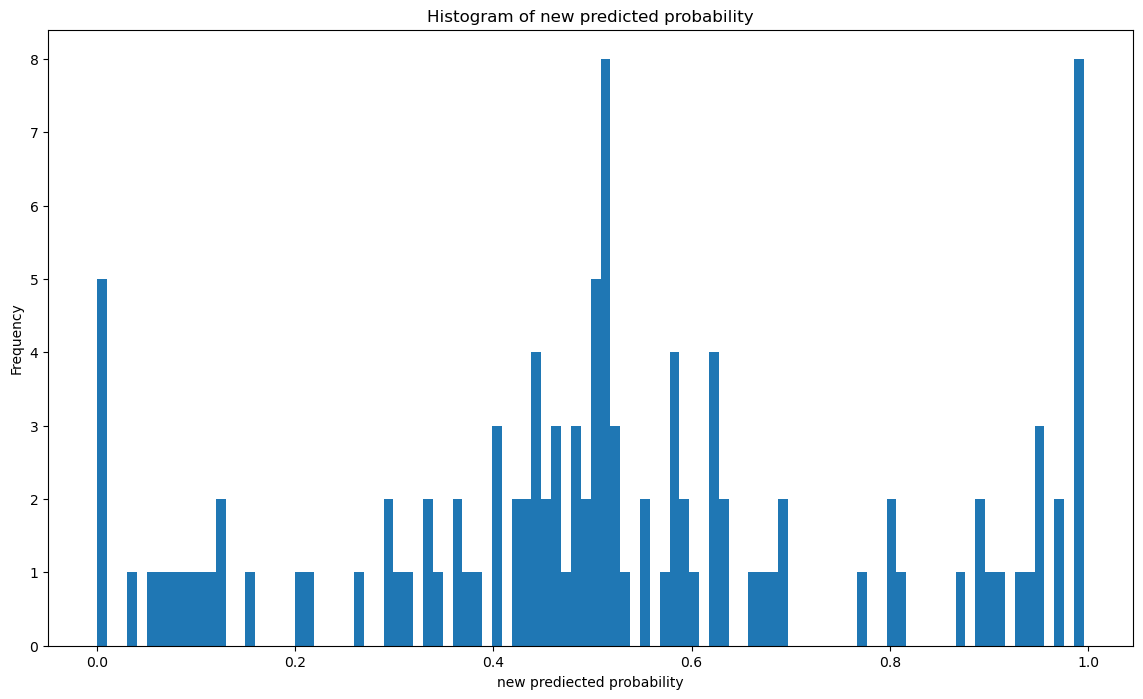

In [6]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [7]:
exact_ks = np.load("exact_ks_IP.npy")
app_k_nonon=[app_k[i] for i in range(new_pred_k) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(exact_ks, bins=100)
plt.xlabel("k that can flip the label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'exact_ks_IP.npy'

# How many of them is None

In [8]:
np.sum([app_k[i] != None for i in range(new_pred_k.shape[0])])

114

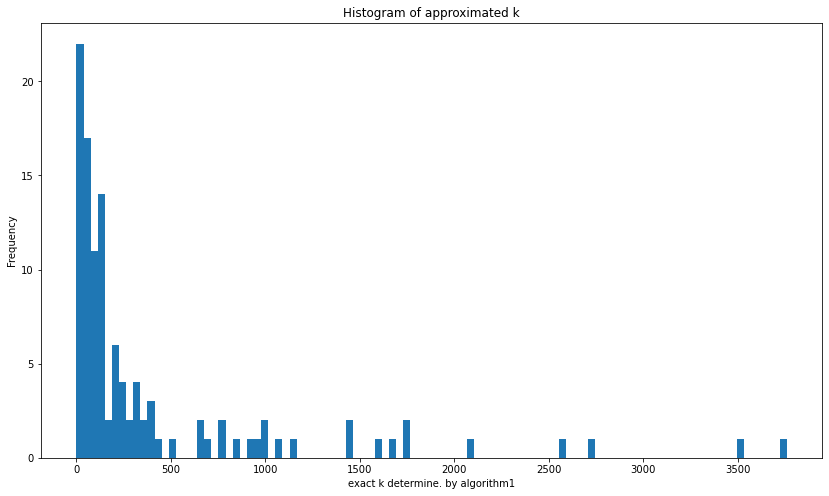

In [54]:
app_k_nonon=[app_k[i] for i in range(new_pred_k.shape[0]) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

In [35]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(exact_ks, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

NameError: name 'exact_ks' is not defined

<Figure size 1008x576 with 0 Axes>

# For those are not None, how is the flip

In [61]:
flips = np.zeros((new_pred_k.shape[0], 1))
diff = np.zeros((new_pred_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(new_pred_k.shape[0]):
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.2748594783140228
new 0.9743993646105525
appro k 118
flip label [1.]

old 0.22657774560108446
new 0.9632434959894152
appro k 141
flip label [1.]

old 0.8864472893928501
new 7.513093053375219e-07
appro k 1676
flip label [1.]

old 0.1459638766789522
new 0.9993218328962026
appro k 373
flip label [1.]

old 0.276018412830747
new 0.9576108092522893
appro k 89
flip label [1.]

old 0.4848472168301565
new 0.8624298407241414
appro k 4
flip label [1.]

old 0.7442830398815706
new 0.08685835430735338
appro k 83
flip label [1.]

old 0.14556645468468407
new 0.9998790966677573
appro k 780
flip label [1.]

old 0.8598663903923496
new 4.45012299197562e-05
appro k 669
flip label [1.]

old 0.32894260510284873
new 0.7309410052072397
appro k 78
flip label [1.]

old 0.6520579273614638
new 0.3071784133459746
appro k 49
flip label [1.]

old 0.8847335011712302
new 3.863940874065676e-08
appro k 3502
flip label [1.]

old 0.12923369679036142
new 0.9999983065666274
appro k 2582
flip label [1.]

old 0.2233266736

In [62]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(new_pred_k.shape[0])])
num_flip

102

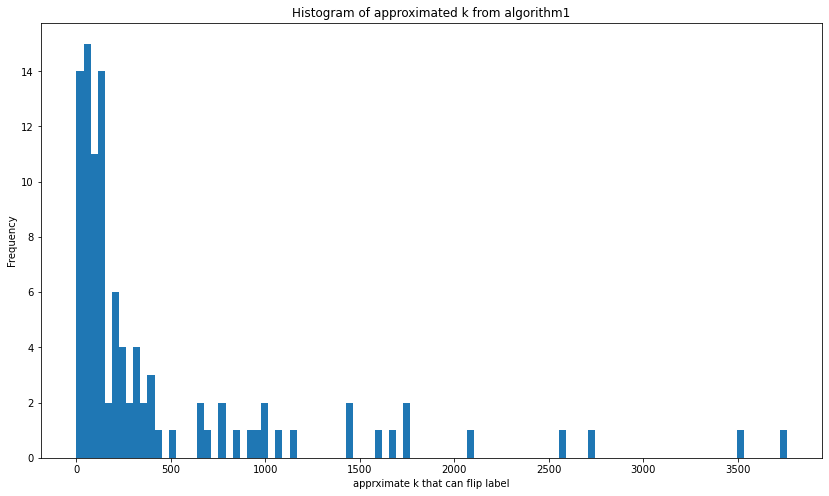

In [80]:

flip_idx = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [64]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(new_pred_k.shape[0])])
num_noflip

10

In [65]:
num_nok = np.sum([flips[i] == 2 for i in range(new_pred_k.shape[0])])
num_nok

1186

In [66]:
# diff for those flip the lable
diff1=[diff[i] for i in range(new_pred_k) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.39147924586494504, 0.018817115123933525)

In [67]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(new_pred_k) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(0.12985493207819768, 0.0067195366443744495)

In [72]:
index1 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1]

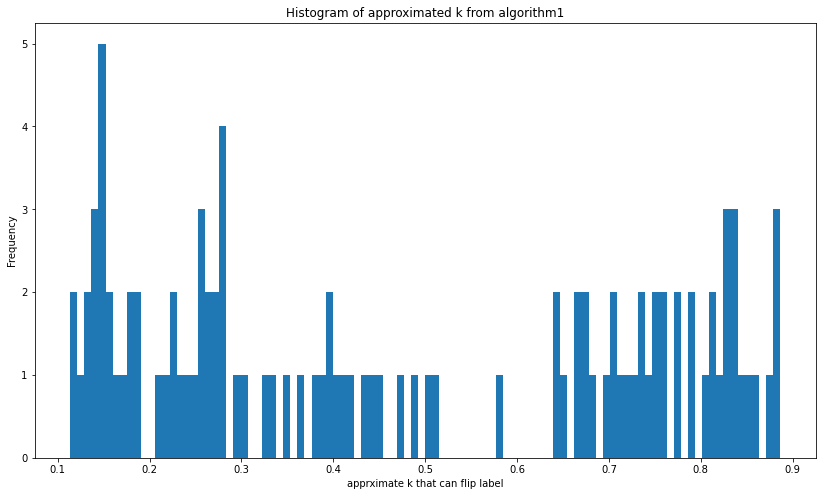

In [76]:

# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(pred[index1], bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [77]:
index10 = [i for i in range(new_pred_k.shape[0]) if flips[i] == 1 or 0]

In [79]:
np.array(index10)

array([  18,   20,   25,   31,   53,   61,   76,   84,   88,   95,  101,
        104,  105,  116,  123,  124,  128,  130,  154,  158,  169,  197,
        199,  217,  238,  259,  274,  275,  277,  290,  303,  316,  317,
        318,  327,  331,  353,  371,  393,  403,  429,  449,  467,  485,
        486,  489,  495,  543,  548,  563,  579,  604,  637,  650,  672,
        679,  695,  735,  768,  772,  788,  791,  804,  806,  811,  846,
        857,  864,  876,  915,  918,  923,  943,  946,  950,  952,  956,
        958,  975,  978, 1013, 1015, 1026, 1034, 1037, 1041, 1068, 1100,
       1116, 1144, 1159, 1160, 1161, 1178, 1213, 1219, 1220, 1234, 1257,
       1271, 1286, 1291])

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'